# Set up environment and load in data

In [3]:
library(tidyverse)
library(here)
theme_set(theme_bw())
helpers_path = here()

# YN Task

In [4]:
data_yn = read.csv(paste0(helpers_path, '/inputs/data_choiceYN.csv'))

Columns according to a readme file:

| Column      | Description |
| ----------- | ----------- |
| subnum | Subject Number |
| day | day number |
| week | week number |
| stimNum  | stimulus number, each stimulus has a identification number |
| stimLettNum | number of the combination of letters in the stimulus, each letter combination has a identification number |
| type  | stimulus' type:   0  == regular exposure; 1  == hypertrained |
| orientation  | orientation angle of the grid |
| filling  | amount of angle filled with color |
| shape | shape number |
| valueO | value in weight of the orientation |
| valueF | value in weight of the filling |
| valueS | value in weight of the shape |
| session | session number |
| yesChosen  | 1 if yes is chosen 0 otherwise |
| response | number of response button for left arrow or right arrow |
| payoff | payoff from trial |
| possiblePayoff | possible payoff from stimulus if yes chosen |
| reference | value of reference amount (if no chosen) can be 0 50 or -50 |
| rt | response time |
| fmri | 1 if the subject was in the scanner during that trial, 0 otherwise |
| startFix | start fixation time when stimulus appears |
| evtimeON | time of the eye tracker on | 
| evtimeOFF | time eye tracker off | 
| crossON | time when the fixation cross is in the middle |

Not in the data that's read in even though it's listed above

| Column      | 
| ----------- | 
| stimLettNum |

Additional columns without descriptions

| Column      | 
| ----------- | 
| inizialTime | 
| endTime | 
| inizialTimeResp | 
| endTimeResp | 

In [5]:
names(data_yn)

[1] "subnum"          "day"             "week"            "stimNum"        
 [5] "type"            "orientation"     "filling"         "shape"          
 [9] "valueO"          "valueF"          "valueS"          "session"        
[13] "yesChosen"       "response"        "payoff"          "possiblePayoff" 
[17] "reference"       "inizialTime"     "endTime"         "inizialTimeResp"
[21] "endTimeResp"     "rt"              "startFix"        "evtimeON"       
[25] "evtimeOFF"       "crossON"         "fmri"

## Visits and number of trials

6 unique subjects

In [6]:
unique(data_yn$subnum)

[1] 601 609 611 619 621 629

Up to 11 sessions per subject

In [7]:
unique(data_yn$day)

[1]  1 10 11  2  3  4  5  6  7  8  9

All subjects have 800 trials (4 blocks) of the YN task on each day **except for subject 621 on the 11th day**.

In [8]:
with(data_yn %>% filter(session != -99), table(subnum, day))

      day
subnum   1   2   3   4   5   6   7   8   9  10  11
   601 800 800 800 800 800 800 800 800 800 800 800
   609 800 800 800 800 800 800 800 800 800 800 800
   611 800 800 800 800 800 800 800 800 800 800 800
   619 800 800 800 800 800 800 800 800 800 800 800
   621 800 800 800 800 800 800 800 800 800 800 600
   629 800 800 800 800 800 800 800 800 800 800 800

All subjects are **missing a fourth session in the last week** (what should have been visit 12)

In [9]:
with(data_yn, table(subnum, week))

      week
subnum    1    2    3
   601 3200 3200 2400
   609 3200 3200 2400
   611 3200 3200 2400
   619 3200 3200 2400
   621 3200 3200 2400
   629 3200 3200 2400

## Unique stims

There are 726 unique stimuli used (6 shapes x 11 orientations x 11 filling weights)

In [10]:
length(unique(data_yn$stimNum))

[1] 726

How many unique stimuli does each subject see? Only one subjects sees all stims. Others see almost all of them.

In [11]:
data_yn %>%
  group_by(subnum) %>%
  summarise(num_unique_stims = length(unique(stimNum)))

subnum,num_unique_stims
<int>,<int>
601,724
609,726
611,725
619,722
621,725
629,725


## Stim types

On each day each subject encounters 480 HT stimuli and 320 RE stimuli

In [12]:
with(data_yn, table(subnum, day, type))

, , type = 0

      day
subnum   1   2   3   4   5   6   7   8   9  10  11
   601 320 320 320 320 320 320 320 320 320 320 320
   609 320 320 320 320 320 320 320 320 320 320 320
   611 320 320 320 320 320 320 320 320 320 320 320
   619 320 320 320 320 320 320 320 320 320 320 320
   621 320 320 320 320 320 320 320 320 320 320 320
   629 320 320 320 320 320 320 320 320 320 320 320

, , type = 1

      day
subnum   1   2   3   4   5   6   7   8   9  10  11
   601 480 480 480 480 480 480 480 480 480 480 480
   609 480 480 480 480 480 480 480 480 480 480 480
   611 480 480 480 480 480 480 480 480 480 480 480
   619 480 480 480 480 480 480 480 480 480 480 480
   621 480 480 480 480 480 480 480 480 480 480 480
   629 480 480 480 480 480 480 480 480 480 480 480


Each subject has their unique set of 12 HT stimuli.

In [13]:
data_yn %>%
  filter(type == 1) %>%
  group_by(subnum) %>%
  summarise(ht_stims = unique(stimNum), .groups="keep")

Warning message:
"Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
i Please use `reframe()` instead.
i When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly."


subnum,ht_stims
<int>,<int>
601,371
601,123
601,333
601,645
601,372
601,698
601,620
601,100
601,670


## Stims by features

Possible values for the orientation attribute:

In [14]:
sort(unique(data_yn$orientation))

[1]   0  15  30  45  60  75  90 105 120 135 150

0 and 90 are the most common orientations

In [15]:
table(data_yn$orientation)


   0   15   30   45   60   75   90  105  120  135  150 
9367 3261 3719 4122 3711 3720 8034 3256 4519 5015 4076 

Subjects have differing frequencies of each orientation

In [16]:
with(data_yn, table(subnum, orientation))

      orientation
subnum    0   15   30   45   60   75   90  105  120  135  150
   601 1197  752  320  773 1194  750 1633  337  760  757  327
   609 1627  787  756  302  335  789 1195  313  754  313 1629
   611 1623  339  309 1207  326  335 1641  322  770 1627  301
   619 1206  759 1200  332  322  337 1180  774 1194 1204  292
   621 1624  308  788  763  776 1188 1188  757  308  337  763
   629 2090  316  346  745  758  321 1197  753  733  777  764

Possible values for the the filling weight:

In [17]:
sort(unique(data_yn$filling))

[1] -0.85 -0.60 -0.40 -0.20  0.00  0.20  0.40  0.60  0.85

**There are 9 unique filling values (not 11)**

In [18]:
length(unique(data_yn$filling))

[1] 9

0 is the most common filling weight followed by |0.4|

In [19]:
table(data_yn$filling)


-0.85  -0.6  -0.4  -0.2     0   0.2   0.4   0.6  0.85 
 3254  5850  6926  3715 14130  2824  7396  4561  4144 

Subjects have differing frequencies of each filling weight. 0 is most common for all but the rest of the order is not the same across subjects.

In [20]:
with(data_yn, table(subnum, filling))

      filling
subnum -0.85 -0.6 -0.4 -0.2    0  0.2  0.4  0.6 0.85
   601   337 1619 1083  321 2068  344  645 1182 1201
   609   751 1617  653  761 2071  333 1098  766  750
   611   764  740 1072  775 2073  335 2383  342  316
   619   335 1192 1535  306 2492  324 1088  755  773
   621   747  354  616  760 3370  758  673  751  771
   629   320  328 1967  792 2056  730 1509  765  333

Number of stims with each orientation and filling combination

In [21]:
with(data_yn, table(orientation, filling))

           filling
orientation -0.85 -0.6 -0.4 -0.2    0  0.2  0.4  0.6 0.85
        0     182  189  342  614 5404  613  805  605  613
        15    611  615  349  178  169  165  388  175  611
        30    173  624  781  181  602  178  365  620  195
        45    622  613  354  612  160  181  788  183  609
        60    183  170  796  208  617  182  789  604  162
        75    182  619  354  184  613  180  785  620  183
        90    162  171  351  167 5403  179  793  186  622
        105   183  152 1251  616  181  178  341  186  168
        120   162  176 1225  609  608  168  348  607  616
        135   184 1495  777  174  183  186 1655  180  181
        150   610 1026  346  172  190  614  339  595  184

Possible values for the stim shape

In [22]:
unique(data_yn$shape)

[1] 5 6 2 4 1 3

Frequency of each shape across all data

In [23]:
table(data_yn$shape)


   1    2    3    4    5    6 
8389 7954 9171 8739 8849 9698 

Subjects see each shape with different frequencies.

In [24]:
with(data_yn, table(subnum, shape))

      shape
subnum    1    2    3    4    5    6
   601 1018 2355 1895 1452 1045 1035
   609  598 1465 1854 1472 1083 2328
   611 1039 1014 1478 1889 2337 1043
   619 1501  608 1020 2324 1464 1883
   621 1881 1482 1451 1053 1027 1906
   629 2352 1030 1473  549 1893 1503

Number of stimuli in each combination of orientation, filling weight and shape

In [25]:
with(data_yn, table(orientation, filling, shape))

, , shape = 1

           filling
orientation -0.85 -0.6 -0.4 -0.2    0  0.2  0.4  0.6 0.85
        0      26   34   55   30  899   27   59   37   29
        15     29   31   60   23   22   36   63   32   29
        30     32   27   58   26   31   29   59   25   31
        45     30  468   63   36   31   29  493   35   29
        60     31   29   60   29  466   27   57   30   31
        75     27   36   60   28   28   34   62   34   31
        90     27   29   67   25  467   34   54   32   30
        105    37   32  501  470   33   32   52   28   26
        120    27   26   61   30   31   25   62   32   31
        135    29  465   55   27   41   34  487   34   30
        150    28   22   52   28   29  466   52   25   31

, , shape = 2

           filling
orientation -0.85 -0.6 -0.4 -0.2    0  0.2  0.4  0.6 0.85
        0      29   28   58   35 1337   34   68   24   31
        15     33   35   60   34   33   27   71   33   31
        30     30   30   54   28   28   26   55   32   38
   

Possible values for the value weight of each orientation

In [26]:
unique(data_yn$valueO)

[1] -0.4 -1.0 -0.2  0.6 -0.8  0.4  1.0 -0.6  0.2  0.0  0.8

Frequency of each orientation value weight

In [27]:
table(data_yn$valueO)


  -1 -0.8 -0.6 -0.4 -0.2    0  0.2  0.4  0.6  0.8    1 
6314 4583 4140 2795 5877 3720 5868 4583 4098 3693 7129 

75 degrees has a value of 0. The further away the orientation from 75 the larger the gain/loss.

In [28]:
with(data_yn, table(valueO, orientation))

      orientation
valueO    0   15   30   45   60   75   90  105  120  135  150
  -1   4923    0    0    0    0    0    0    0    0    0 1391
  -0.8    0 1862    0    0    0    0    0    0    0 2721    0
  -0.6    0    0 2302    0    0    0    0    0 1838    0    0
  -0.4    0    0    0 1379    0    0    0 1416    0    0    0
  -0.2    0    0    0    0 1415    0 4462    0    0    0    0
  0       0    0    0    0    0 3720    0    0    0    0    0
  0.2     0    0    0    0 2296    0 3572    0    0    0    0
  0.4     0    0    0 2743    0    0    0 1840    0    0    0
  0.6     0    0 1417    0    0    0    0    0 2681    0    0
  0.8     0 1399    0    0    0    0    0    0    0 2294    0
  1    4444    0    0    0    0    0    0    0    0    0 2685

Whether an orientation will have a positive or negative value weight varies for each subject.

In [29]:
with(data_yn, table(valueO, orientation, subnum))

, , subnum = 601

      orientation
valueO    0   15   30   45   60   75   90  105  120  135  150
  -1      0    0    0    0    0    0    0    0    0    0  327
  -0.8    0    0    0    0    0    0    0    0    0  757    0
  -0.6    0    0    0    0    0    0    0    0  760    0    0
  -0.4    0    0    0    0    0    0    0  337    0    0    0
  -0.2    0    0    0    0    0    0 1633    0    0    0    0
  0       0    0    0    0    0  750    0    0    0    0    0
  0.2     0    0    0    0 1194    0    0    0    0    0    0
  0.4     0    0    0  773    0    0    0    0    0    0    0
  0.6     0    0  320    0    0    0    0    0    0    0    0
  0.8     0  752    0    0    0    0    0    0    0    0    0
  1    1197    0    0    0    0    0    0    0    0    0    0

, , subnum = 609

      orientation
valueO    0   15   30   45   60   75   90  105  120  135  150
  -1   1627    0    0    0    0    0    0    0    0    0    0
  -0.8    0  787    0    0    0    0    0    0    0    0   

Possible values for the value weight of each filling weight

In [30]:
unique(data_yn$valueF)

[1]  0.4  0.8 -0.8  1.0 -1.0  0.0 -0.4 -0.6 -0.2  0.6  0.2

Frequency of each filling value weight

In [31]:
table(data_yn$valueF)


   -1  -0.8  -0.6  -0.4  -0.2     0   0.2   0.4   0.6   0.8     1 
 2818  5038  3672  4552  2785 14130  3754  2390  3708  5373  4580 

Filling weight 0 has 0 value and the further away from 0 has larger gain/loss. All filling weights are associated with one absolute value except for filling weight |0.4| which can have a value of |0.4| or |0.6|.

In [32]:
with(data_yn, table(valueF, filling))

      filling
valueF -0.85  -0.6  -0.4  -0.2     0   0.2   0.4   0.6  0.85
  -1    1419     0     0     0     0     0     0     0  1399
  -0.8     0  3165     0     0     0     0     0  1873     0
  -0.6     0     0  1847     0     0     0  1825     0     0
  -0.4     0     0  1387     0     0     0  3165     0     0
  -0.2     0     0     0  1387     0  1398     0     0     0
  0        0     0     0     0 14130     0     0     0     0
  0.2      0     0     0  2328     0  1426     0     0     0
  0.4      0     0  1411     0     0     0   979     0     0
  0.6      0     0  2281     0     0     0  1427     0     0
  0.8      0  2685     0     0     0     0     0  2688     0
  1     1835     0     0     0     0     0     0     0  2745

Whether a filling will have a positive or negative value weight varies for each subject.

In [33]:
with(data_yn, table(valueF, filling, subnum))

, , subnum = 601

      filling
valueF -0.85 -0.6 -0.4 -0.2    0  0.2  0.4  0.6 0.85
  -1     337    0    0    0    0    0    0    0    0
  -0.8     0 1619    0    0    0    0    0    0    0
  -0.6     0    0  773    0    0    0    0    0    0
  -0.4     0    0  310    0    0    0    0    0    0
  -0.2     0    0    0  321    0    0    0    0    0
  0        0    0    0    0 2068    0    0    0    0
  0.2      0    0    0    0    0  344    0    0    0
  0.4      0    0    0    0    0    0  329    0    0
  0.6      0    0    0    0    0    0  316    0    0
  0.8      0    0    0    0    0    0    0 1182    0
  1        0    0    0    0    0    0    0    0 1201

, , subnum = 609

      filling
valueF -0.85 -0.6 -0.4 -0.2    0  0.2  0.4  0.6 0.85
  -1       0    0    0    0    0    0    0    0  750
  -0.8     0    0    0    0    0    0    0  766    0
  -0.6     0    0    0    0    0    0  775    0    0
  -0.4     0    0    0    0    0    0  323    0    0
  -0.2     0    0    0    0    0  

Possible values for the value weight of each shape

In [34]:
unique(data_yn$valueS)

[1]  0.2 -1.0 -0.2  0.6  1.0 -0.6

Frequency of each shape value weight

In [35]:
table(data_yn$valueS)


  -1 -0.6 -0.2  0.2  0.6    1 
9299 9561 9234 6633 9710 8363 

Whether a shape will have a positive or negative value weight varies for each subject.

In [36]:
with(data_yn, table(valueS, shape, subnum))

, , subnum = 601

      shape
valueS    1    2    3    4    5    6
  -1      0    0    0    0    0 1035
  -0.6    0    0 1895    0    0    0
  -0.2    0 2355    0    0    0    0
  0.2     0    0    0    0 1045    0
  0.6     0    0    0 1452    0    0
  1    1018    0    0    0    0    0

, , subnum = 609

      shape
valueS    1    2    3    4    5    6
  -1      0    0    0    0 1083    0
  -0.6    0    0    0    0    0 2328
  -0.2  598    0    0    0    0    0
  0.2     0    0    0 1472    0    0
  0.6     0 1465    0    0    0    0
  1       0    0 1854    0    0    0

, , subnum = 611

      shape
valueS    1    2    3    4    5    6
  -1      0    0    0 1889    0    0
  -0.6    0 1014    0    0    0    0
  -0.2    0    0    0    0    0 1043
  0.2  1039    0    0    0    0    0
  0.6     0    0    0    0 2337    0
  1       0    0 1478    0    0    0

, , subnum = 619

      shape
valueS    1    2    3    4    5    6
  -1      0    0    0    0    0 1883
  -0.6    0    0    0 2324

## Session (Run)

There is an error in the session column.

In [37]:
unique(data_yn$session)

[1]   1   2   3   4 -99

One session 3 is mis-assigned to -99.

In [38]:
table(data_yn$session)


  -99     1     2     3     4 
  200 13200 13200 13000 13200 

**Subject 621 does not have session 3 on day 11.**

In [39]:
with(data_yn, table(subnum, session))

      session
subnum  -99    1    2    3    4
   601    0 2200 2200 2200 2200
   609    0 2200 2200 2200 2200
   611    0 2200 2200 2200 2200
   619    0 2200 2200 2200 2200
   621  200 2200 2200 2000 2200
   629    0 2200 2200 2200 2200

In [40]:
data_yn_clean = data_yn %>%
  filter(session != -99)

What exactly are these sessions compared with `day` and `week` columns? They are runs. Subjects complete 4 runs of 200 trials per visit.

In [41]:
with(data_yn_clean, table(session, week))

       week
session    1    2    3
      1 4800 4800 3600
      2 4800 4800 3600
      3 4800 4800 3400
      4 4800 4800 3600

In [42]:
with(data_yn, table(session, day))

       day
session    1    2    3    4    5    6    7    8    9   10   11
    -99    0    0    0    0    0    0    0    0    0    0  200
    1   1200 1200 1200 1200 1200 1200 1200 1200 1200 1200 1200
    2   1200 1200 1200 1200 1200 1200 1200 1200 1200 1200 1200
    3   1200 1200 1200 1200 1200 1200 1200 1200 1200 1200 1000
    4   1200 1200 1200 1200 1200 1200 1200 1200 1200 1200 1200

## Choice

Choice data is missing for one run so looking at choice only in dataset that excludes run 3 of day 11 for subnum 621.  

In the remaining data the only values for whether "Yes" was chosen are:  

In [43]:
unique(data_yn_clean$yesChosen)

[1] 1 0

Response buttons

In [44]:
unique(data_yn_clean$response)

[1] 39 37 49 51

In [45]:
with(data_yn_clean, table(fmri,response))

    response
fmri    37    39    49    51
   0 22754 22646     0     0
   1     0     0  4049  3151

Yes button counterbalanced across subjects.

In [46]:
with(data_yn_clean, table(yesChosen,response, subnum))

, , subnum = 601

         response
yesChosen   37   39   49   51
        0 4209    0    0  422
        1    0 3391  778    0

, , subnum = 609

         response
yesChosen   37   39   49   51
        0 3713    0    0  400
        1    0 3887  800    0

, , subnum = 611

         response
yesChosen   37   39   49   51
        0 3585    0    0  760
        1    0 4015  440    0

, , subnum = 619

         response
yesChosen   37   39   49   51
        0    0 4327  739    0
        1 3273    0    0  461

, , subnum = 621

         response
yesChosen   37   39   49   51
        0    0 3205  765    0
        1 4195    0    0  435

, , subnum = 629

         response
yesChosen   37   39   49   51
        0    0 3821  527    0
        1 3779    0    0  673


## Payoff

The actual payoffs are higher than the possiblePayoffs presumably because subjects initially reject gambling and learn about the possible payoffs of the stimuli and then choose to play gambles with positive expected value.

In [47]:
summary(data_yn_clean$payoff)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-143.00    0.00   25.00   26.98   50.00  160.00 

In [48]:
summary(data_yn_clean$possiblePayoff)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-168.0000  -35.0000    2.0000    0.7748   40.0000  160.0000 

## Reference value

Frequency of the reference value for when subject chooses "No" for a stim:

In [49]:
with(data_yn_clean, table(subnum, reference))

      reference
subnum  -50    0   50
   601 2200 4400 2200
   609 2200 4400 2200
   611 2200 4400 2200
   619 2200 4400 2200
   621 2000 4400 2200
   629 2200 4400 2200

In [50]:
with(data_yn_clean, table(subnum, day, reference))

, , reference = -50

      day
subnum   1   2   3   4   5   6   7   8   9  10  11
   601 200 200 200 200 200 200 200 200 200 200 200
   609 200 200 200 200 200 200 200 200 200 200 200
   611 200 200 200 200 200 200 200 200 200 200 200
   619 200 200 200 200 200 200 200 200 200 200 200
   621 200 200 200 200 200 200 200 200 200 200   0
   629 200 200 200 200 200 200 200 200 200 200 200

, , reference = 0

      day
subnum   1   2   3   4   5   6   7   8   9  10  11
   601 400 400 400 400 400 400 400 400 400 400 400
   609 400 400 400 400 400 400 400 400 400 400 400
   611 400 400 400 400 400 400 400 400 400 400 400
   619 400 400 400 400 400 400 400 400 400 400 400
   621 400 400 400 400 400 400 400 400 400 400 400
   629 400 400 400 400 400 400 400 400 400 400 400

, , reference = 50

      day
subnum   1   2   3   4   5   6   7   8   9  10  11
   601 200 200 200 200 200 200 200 200 200 200 200
   609 200 200 200 200 200 200 200 200 200 200 200
   611 200 200 200 200 200 200 200 200 20

In [51]:
with(data_yn_clean, table(subnum, session, reference))

, , reference = -50

      session
subnum    1    2    3    4
   601    0    0 2200    0
   609    0    0 2200    0
   611    0    0 2200    0
   619    0    0 2200    0
   621    0    0 2000    0
   629    0    0 2200    0

, , reference = 0

      session
subnum    1    2    3    4
   601 2200    0    0 2200
   609 2200    0    0 2200
   611 2200    0    0 2200
   619 2200    0    0 2200
   621 2200    0    0 2200
   629 2200    0    0 2200

, , reference = 50

      session
subnum    1    2    3    4
   601    0 2200    0    0
   609    0 2200    0    0
   611    0 2200    0    0
   619    0 2200    0    0
   621    0 2200    0    0
   629    0 2200    0    0


There are the same number of trials for each reference value in the scanner across subjects but these are not equally distributed across subjects. A third of the subjects have seen all reference values in the scanner while the other two thirds have either not seen the 50 or -50 in the scanner.

In [52]:
with(data_yn_clean, table(subnum, reference, fmri))

, , fmri = 0

      reference
subnum  -50    0   50
   601 1600 3800 2200
   609 1600 3800 2200
   611 2200 3800 1600
   619 2000 3800 1800
   621 2000 3800 1600
   629 1800 3800 2000

, , fmri = 1

      reference
subnum  -50    0   50
   601  600  600    0
   609  600  600    0
   611    0  600  600
   619  200  600  400
   621    0  600  600
   629  400  600  200


## fMRI trials

Number of trials for each run of the task in and out of the scanner across subjects

In [53]:
with(data_yn_clean, table(subnum, session, fmri))

, , fmri = 0

      session
subnum    1    2    3    4
   601 2200 2200 1600 1600
   609 2200 2200 1600 1600
   611 2200 1600 2200 1600
   619 2200 1800 2000 1600
   621 2200 1600 2000 1600
   629 2200 2000 1800 1600

, , fmri = 1

      session
subnum    1    2    3    4
   601    0    0  600  600
   609    0    0  600  600
   611    0  600    0  600
   619    0  400  200  600
   621    0  600    0  600
   629    0  200  400  600


All subjects have 400 trials (2 runs) per each of the 3 fmri visits

In [54]:
with(data_yn_clean, table(subnum, day, fmri))

, , fmri = 0

      day
subnum   1   2   3   4   5   6   7   8   9  10  11
   601 800 800 400 800 800 800 400 800 800 800 400
   609 800 800 400 800 800 800 400 800 800 800 400
   611 800 800 400 800 800 800 400 800 800 800 400
   619 800 800 400 800 800 800 400 800 800 800 400
   621 800 800 400 800 800 800 400 800 800 800 200
   629 800 800 400 800 800 800 400 800 800 800 400

, , fmri = 1

      day
subnum   1   2   3   4   5   6   7   8   9  10  11
   601   0   0 400   0   0   0 400   0   0   0 400
   609   0   0 400   0   0   0 400   0   0   0 400
   611   0   0 400   0   0   0 400   0   0   0 400
   619   0   0 400   0   0   0 400   0   0   0 400
   621   0   0 400   0   0   0 400   0   0   0 400
   629   0   0 400   0   0   0 400   0   0   0 400


Subjects completed 2nd to 4th sesssions in the scanner, never the first session. **But I'm not sure if subjects who completed sessions 2 and 4 were taken out of the scanner for session 3.**

In [55]:
with(data_yn_clean %>% filter(fmri==1), table(subnum, session, day))

, , day = 3

      session
subnum   2   3   4
   601   0 200 200
   609   0 200 200
   611 200   0 200
   619 200   0 200
   621 200   0 200
   629   0 200 200

, , day = 7

      session
subnum   2   3   4
   601   0 200 200
   609   0 200 200
   611 200   0 200
   619 200   0 200
   621 200   0 200
   629   0 200 200

, , day = 11

      session
subnum   2   3   4
   601   0 200 200
   609   0 200 200
   611 200   0 200
   619   0 200 200
   621 200   0 200
   629 200   0 200


## RT

Any negative RTs? No.

In [56]:
sum(data_yn_clean$rt< 0)

[1] 0

Distribution of the RTs.

In [57]:
summary(data_yn_clean$rt)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0009  0.5291  0.6551  0.9094  0.9261 55.7349 

There are some trials with very long RTs

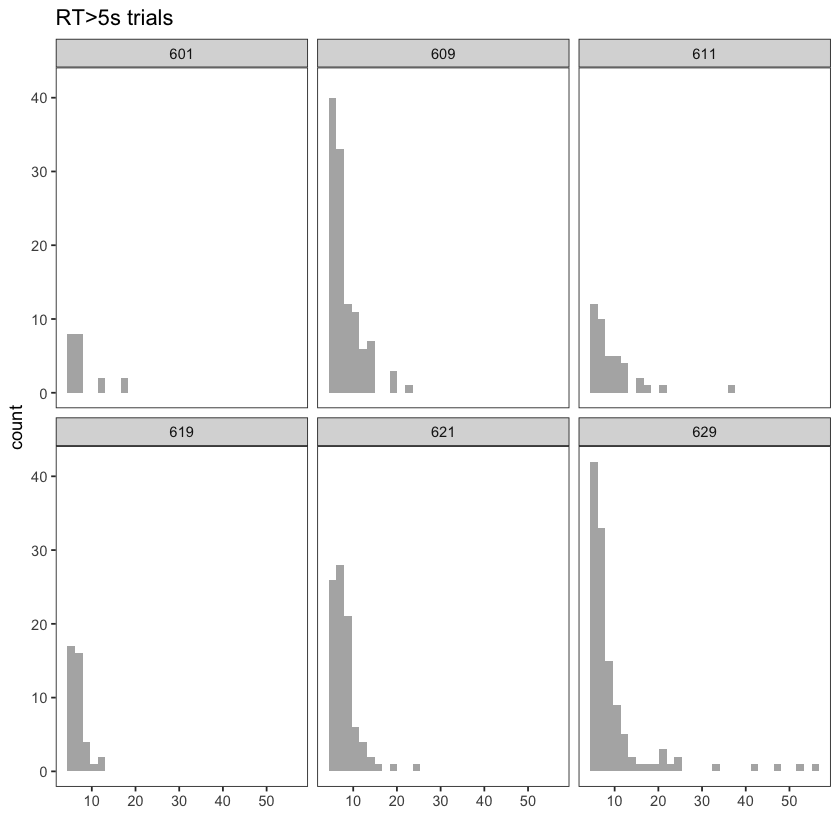

In [58]:
data_yn_clean %>%
  filter(rt>5) %>%
  ggplot(aes(rt))+
  geom_histogram(alpha=0.5, bins=30)+
  theme(panel.grid = element_blank())+
  facet_wrap(~subnum)+
  xlab("")+
  labs(title="RT>5s trials")

Number of trials with longer than 5 s RTs for each subject across visits.

In [59]:
with(data_yn_clean %>% filter(rt>5), table(subnum, day))

      day
subnum  1  2  3  4  5  6  7  8  9 10 11
   601  9  1  1  2  1  0  1  2  0  1  2
   609  0  1  3  2  3  2 16 13 36 13 24
   611 28  0  0  0  0  0 12  0  0  0  1
   619  3  1  3  1  2  1 13  0  2  6  8
   621 51 13  3 10  3  0  1  1  4  1  3
   629 33  7 11  4 11  8  7 15 13  8  3

Proportion of all trials with RT > 5s

In [60]:
nrow(data_yn_clean %>% filter(rt>5))/nrow(data_yn_clean)

[1] 0.008060837

What proportion of slow trials is from each subject?

In [61]:
round(with(data_yn_clean %>% filter(rt>5), table(subnum))/nrow(data_yn_clean %>% filter(rt>5)), 3)

subnum
  601   609   611   619   621   629 
0.047 0.267 0.097 0.094 0.212 0.283 

## Blank columns

In [62]:
for (i in 1:length(names(data_yn))){
  cur_col = names(data_yn)[i]
  if(unique(data_yn[,cur_col])[1] == "-99" && length(unique(data_yn[,cur_col]))==1){
    print(cur_col)
  }
}

[1] "inizialTime"
[1] "endTime"
[1] "inizialTimeResp"
[1] "endTimeResp"


Drop the above columns without data

In [63]:
data_yn_clean = data_yn_clean %>%
  select(-inizialTime, -inizialTimeResp, -endTime, -endTimeResp)

## Eyetracking columns with little description

This is probably when each trial began but I don't know what it is in reference to.

In [64]:
length(unique(data_yn_clean$startFix))

[1] 52600

These are presumably eye-tracking data for fmri trial but no idea what units they are in or what the reference is. I'll keep them but can't use them for any analysis yet.

In [65]:
length(unique(data_yn_clean$evtimeON))

[1] 7197

In [66]:
length(unique(data_yn_clean$evtimeOFF))

[1] 7201

In [67]:
length(unique(data_yn_clean$crossON))

[1] 7201

# BC Task

In [68]:
data_bc = read.csv(paste0(helpers_path, '/inputs/data_choiceBC.csv'))

Columns according to a readme file:

| Column      | Description |
| ----------- | ----------- |
| subnum | Subject Number |
| day | day number | 
| week | week number | 
| stimNumLeft | stimulus on the left number, each stimulus has a identification number | 
| stimNumRight | stimulus on the right number, each stimulus has a identification number | 
| stimLettNumLeft | number of the combination of letters in the stimulus on the left, each letter combination has a identification number | 
| stimLettNumRight | number of the combination of letters in the stimulus on the right, each letter combination has a identification number | 
| TypeLeft | stimulus' type on the left:   0  == regular exposure; 1  == hypertrained | 
| TypeRight | type of stimulus on the right | 
| OrientationLeft | orientation angle of the grid for stimulus of the left | 
| FillingLeft | amount of angle filled with color for stimulus of the left | 
| ShapeLeft | shape in the stimulus of the left | 
| valueOLeft | value in weight of the orientation for stimulus of the left | 
| valueFLeft | value in weight of the filling for stimulus of the left | 
| valueSLeft | value in weight of the shape on the right |  
| OrientationRight | orientation angle of the grid for stimulus of the right | 
| FillingRight | amount of angle filled with color for stimulus of the right | 
| ShapeRight | shape in the stimulus of the right | 
| valueORight | value in weight of the orientation for stimulus of the right | 
| valueFRight | value in weight of the filling for stimulus of the right | 
| valueSRight | value in weight of the shape on the right |  
| leftChosen | 1 if left option is chosen 0 otherwise | 
| Response | number of response button for left arrow or right arrow | 
| Payoff | payoff from trial | 
| possiblePayoffLeft | possible payoff from stimulus on the left | 
| possiblePayoffRight | possible payoff from stimulus on the right | 
| Rt | response time |  
| fmri | 1 if the subject was in the scanner during that trial, 0 otherwise | 
| startFix | start fixation time when stimulus appears |
| evtimeON | time of the eye tracker on | 
| evtimeOFF | time eye tracker off | 
| crossON | time when the fixation cross is in the middle |

Additional columns without descriptions

| Column      | 
| ----------- | 
| inizialTime | 
| endTime | 
| inizialTimeResp | 
| endTimeResp | 

In [69]:
names(data_bc)

[1] "subnum"              "day"                 "week"               
 [4] "stimNumLef"          "stimNumRight"        "stimLettNumLeft"    
 [7] "stimLettNumRight"    "typeLeft"            "typeRight"          
[10] "orientationLeft"     "fillingLeft"         "shapeLeft"          
[13] "orientationRight"    "fillingRight"        "shapeRight"         
[16] "valueOleft"          "valueFleft"          "valueSleft"         
[19] "valueOright"         "valueFright"         "valueSright"        
[22] "leftChosen"          "response"            "payoff"             
[25] "possiblePayoffleft"  "possiblePayoffright" "inizialTime"        
[28] "endTime"             "inizialTimeResp"     "endTimeResp"        
[31] "rt"                  "startFix"            "evtimeON"           
[34] "evtimeOFF"           "crossON"             "fmri"

## Visits and number of trials

6 unique subjects

In [70]:
unique(data_bc$subnum)

[1] 601 609 611 619 621 629

Up to 11 sessions per subject

In [71]:
sort(unique(data_bc$day))

[1]  1  2  3  4  5  6  7  8  9 10 11

All subjects have 200 trials of the BC task on each day

In [72]:
with(data_bc, table(subnum, day))

      day
subnum   1   2   3   4   5   6   7   8   9  10  11
   601 200 200 200 200 200 200 200 200 200 200 200
   609 200 200 200 200 200 200 200 200 200 200 200
   611 200 200 200 200 200 200 200 200 200 200 200
   619 200 200 200 200 200 200 200 200 200 200 200
   621 200 200 200 200 200 200 200 200 200 200 200
   629 200 200 200 200 200 200 200 200 200 200 200

All subjects are missing a fourth session in the third week (what should have been visit 12)

In [73]:
with(data_bc, table(subnum, week))

      week
subnum   1   2   3
   601 800 800 600
   609 800 800 600
   611 800 800 600
   619 800 800 600
   621 800 800 600
   629 800 800 600

## Unique stims

There are 726 unique stimuli used (6 shapes x 11 orientations x 11 filling weights) on each side

In [74]:
length(unique(data_bc$stimNumLef))

[1] 726

In [75]:
length(unique(data_bc$stimNumRight))

[1] 726

How many unique stimuli does each subject see? 

In [76]:
data_bc %>%
  group_by(subnum) %>%
  summarise(num_unique_left_stims = length(unique(stimNumLef)),
            num_unique_right_stims = length(unique(stimNumRight)))

subnum,num_unique_left_stims,num_unique_right_stims
<int>,<int>,<int>
601,625,628
609,619,622
611,610,630
619,625,622
621,632,604
629,635,628


## Redundant stim num columns

In [77]:
sum(data_bc$stimLettNumLeft == data_bc$stimNumLef) == nrow(data_bc)

[1] TRUE

In [78]:
sum(data_bc$stimLettNumRight == data_bc$stimNumRight) == nrow(data_bc)

[1] TRUE

Drop redundant columns and fix column name

In [79]:
data_bc_clean = data_bc %>%
  select(-stimLettNumLeft, -stimLettNumRight) %>%
  rename(stimNumLeft = stimNumLef)

## Stim types

On each day each subject encounters 66 HT stimuli and 134 RE stimuli

In [80]:
with(data_bc, table(subnum, day, typeLeft))
# with(data_bc, table(subnum, day, typeRight)) #same as above since pairs are of same type

, , typeLeft = 0

      day
subnum   1   2   3   4   5   6   7   8   9  10  11
   601 134 134 134 134 134 134 134 134 134 134 134
   609 134 134 134 134 134 134 134 134 134 134 134
   611 134 134 134 134 134 134 134 134 134 134 134
   619 134 134 134 134 134 134 134 134 134 134 134
   621 134 134 134 134 134 134 134 134 134 134 134
   629 134 134 134 134 134 134 134 134 134 134 134

, , typeLeft = 1

      day
subnum   1   2   3   4   5   6   7   8   9  10  11
   601  66  66  66  66  66  66  66  66  66  66  66
   609  66  66  66  66  66  66  66  66  66  66  66
   611  66  66  66  66  66  66  66  66  66  66  66
   619  66  66  66  66  66  66  66  66  66  66  66
   621  66  66  66  66  66  66  66  66  66  66  66
   629  66  66  66  66  66  66  66  66  66  66  66


Are pairs of same type (ie. choice is either between *two* HT stimuli or *two* RE stimuli)? Yes.

In [81]:
with(data_bc, sum(typeLeft == typeRight)) == nrow(data_bc)

[1] TRUE

## Choice

Possible values for `leftChosen` column. Checking if there are missing trials.

In [82]:
unique(data_bc$leftChosen)

[1] 0 1

Possible response buttons in and out of the scanner.

In [83]:
unique(data_bc$response)

[1] 39 37 51 49

In [84]:
with(data_bc, table(response, fmri))

        fmri
response    0    1
      37 5689    0
      39 5711    0
      49    0  955
      51    0  845

Left-right buttons same across subjects

In [85]:
with(data_bc, table(response, leftChosen, fmri))

, , fmri = 0

        leftChosen
response    0    1
      37    0 5689
      39 5711    0
      49    0    0
      51    0    0

, , fmri = 1

        leftChosen
response    0    1
      37    0    0
      39    0    0
      49  955    0
      51    0  845


## Payoff

Distribution of the earned payoff compared to the possible pay off of each stimuli.

In [86]:
summary(data_bc$payoff)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-144.00   -2.00   30.00   31.65   64.00  160.00 

In [87]:
summary(data_bc$possiblePayoffleft)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-163.0000  -37.0000    1.0000    0.3267   39.2500  157.0000 

In [88]:
summary(data_bc$possiblePayoffright)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-166.0000  -38.0000    1.0000   -0.0422   39.0000  160.0000 

## fMRI trials

In [89]:
with(data_bc, table(subnum, day, fmri))

, , fmri = 0

      day
subnum   1   2   3   4   5   6   7   8   9  10  11
   601 200 200 100 200 200 200 100 200 200 200 100
   609 200 200 100 200 200 200 100 200 200 200 100
   611 200 200 100 200 200 200 100 200 200 200 100
   619 200 200 100 200 200 200 100 200 200 200 100
   621 200 200 100 200 200 200 100 200 200 200 100
   629 200 200 100 200 200 200 100 200 200 200 100

, , fmri = 1

      day
subnum   1   2   3   4   5   6   7   8   9  10  11
   601   0   0 100   0   0   0 100   0   0   0 100
   609   0   0 100   0   0   0 100   0   0   0 100
   611   0   0 100   0   0   0 100   0   0   0 100
   619   0   0 100   0   0   0 100   0   0   0 100
   621   0   0 100   0   0   0 100   0   0   0 100
   629   0   0 100   0   0   0 100   0   0   0 100


## RT

Are there negative RTs? No.

In [90]:
sum(data_bc$rt< 0)

[1] 0

There are again some trials with very long RTs

In [91]:
summary(data_bc$rt)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3471  0.7920  1.1906  1.6509  1.9140 68.5435 

There are some trials with very long RTs

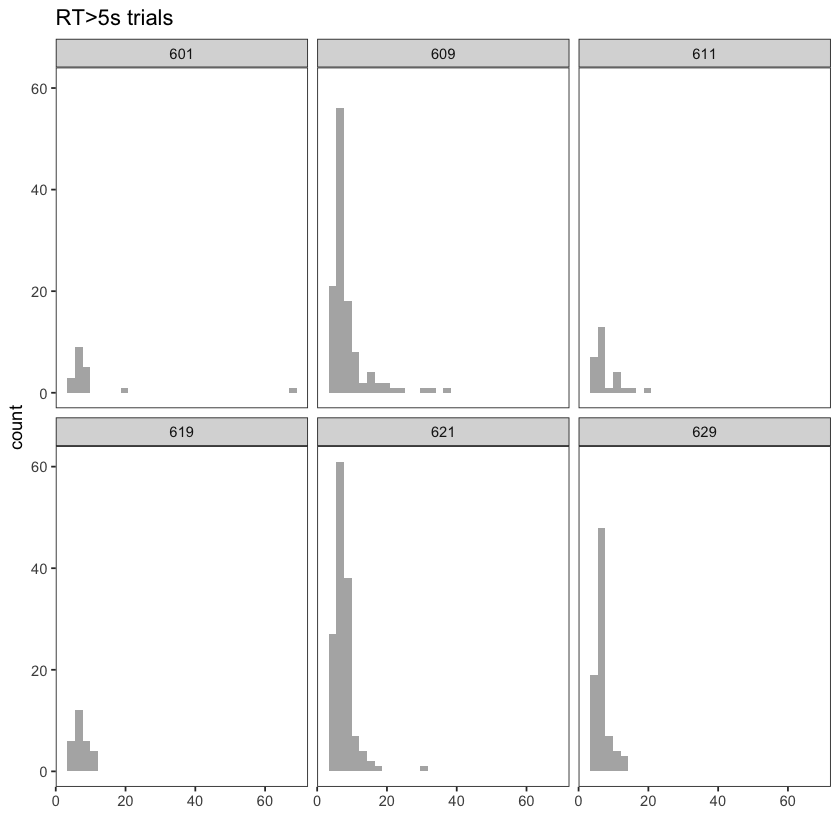

In [92]:
data_bc %>%
  filter(rt>5) %>%
  ggplot(aes(rt))+
  geom_histogram(alpha=0.5, bins=30)+
  theme(panel.grid = element_blank())+
  facet_wrap(~subnum)+
  xlab("")+
  labs(title="RT>5s trials")

Number of trials with longer than 5 s RTs for each subject across visits.

In [93]:
with(data_bc %>% filter(rt>5), table(subnum, day))

      day
subnum  1  2  3  4  5  6  7  8  9 10 11
   601  2  0  0  4  1  5  2  0  1  0  4
   609  8 12  9 11  3  3 19 10 17 12 14
   611  8 11  5  2  0  0  1  0  0  1  0
   619  7  1  1  0  3  3  6  1  3  3  0
   621 22 33  7 15 11 12  5  8 14  5  9
   629 22  7  6  4  7 15  4  4  6  3  3

Proportion of all trials with RT > 5s

In [94]:
nrow(data_bc %>% filter(rt>5))/nrow(data_bc)

[1] 0.03143939

What proportion of slow trials is from each subject? Subjects that has the most slow trials in the YN task also are the ones that have the most slow trials in the BC task as well.

In [95]:
round(with(data_bc%>% filter(rt>5), table(subnum))/nrow(data_bc %>% filter(rt>5)), 3)

subnum
  601   609   611   619   621   629 
0.046 0.284 0.067 0.067 0.340 0.195 

## Blank columns

In [96]:
for (i in 1:length(names(data_bc))){
  cur_col = names(data_bc)[i]
  if(unique(data_bc[,cur_col])[1] == "-99" && length(unique(data_bc[,cur_col]))==1){
    print(cur_col)
  }
}

[1] "inizialTime"
[1] "endTime"
[1] "inizialTimeResp"
[1] "endTimeResp"


Drop blank columns

In [97]:
data_bc_clean = data_bc_clean %>%
  select(-inizialTime, -inizialTimeResp, -endTime, -endTimeResp)

## Eyetracking columns with little description

This is probably when each trial began but I don't know what it is in reference to.

In [98]:
length(unique(data_bc_clean$startFix))

[1] 13200

These are presumably eye-tracking data for fmri trial but no idea what units they are in or what the reference is. I'll keep them but can't use them for any analysis yet.

In [99]:
length(unique(data_bc_clean$evtimeON))

[1] 1801

In [100]:
length(unique(data_bc_clean$evtimeOFF))

[1] 1801

In [101]:
length(unique(data_bc_clean$crossON))

[1] 1801